In [1]:
library(ggplot2)
library(dplyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# redo plots

In [2]:
downsample_df = read.csv("downsample_statistics_00x_REDO.csv") %>% rbind(read.csv("downsample_statistics_0x_REDO.csv"))
downsample_df = downsample_df %>% filter(event %in% c("loss", "gain")) %>% filter(!(downsample_frac %in% c("0.8", "0.9")))
downsample_df 

X,downsample_frac,mean_depth,event,percent_call,precision,recall,specificity,F1
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.01,1920.591,loss,96,0.01502583,0.11347518,0.9788546,0.02653766
2,0.01,1920.591,gain,1471,0.34058810,0.02331996,0.9879001,0.04365115
3,0.02,3814.612,loss,565,0.04000566,0.02411233,0.9941848,0.03008920
5,0.02,3814.612,gain,6198,0.33611714,0.01569627,0.9937542,0.02999194
6,0.03,4747.647,loss,4462,0.12958123,0.03607085,0.9967247,0.05643279
8,0.03,4747.647,gain,24874,0.41149418,0.01813481,0.9954988,0.03473867
9,0.04,5843.952,loss,15072,0.23708924,0.06437037,0.9966410,0.10125086
11,0.04,5843.952,gain,51438,0.50727811,0.02649414,0.9960757,0.05035817
12,0.05,6907.394,loss,20971,0.21998091,0.06251286,0.9961267,0.09735885


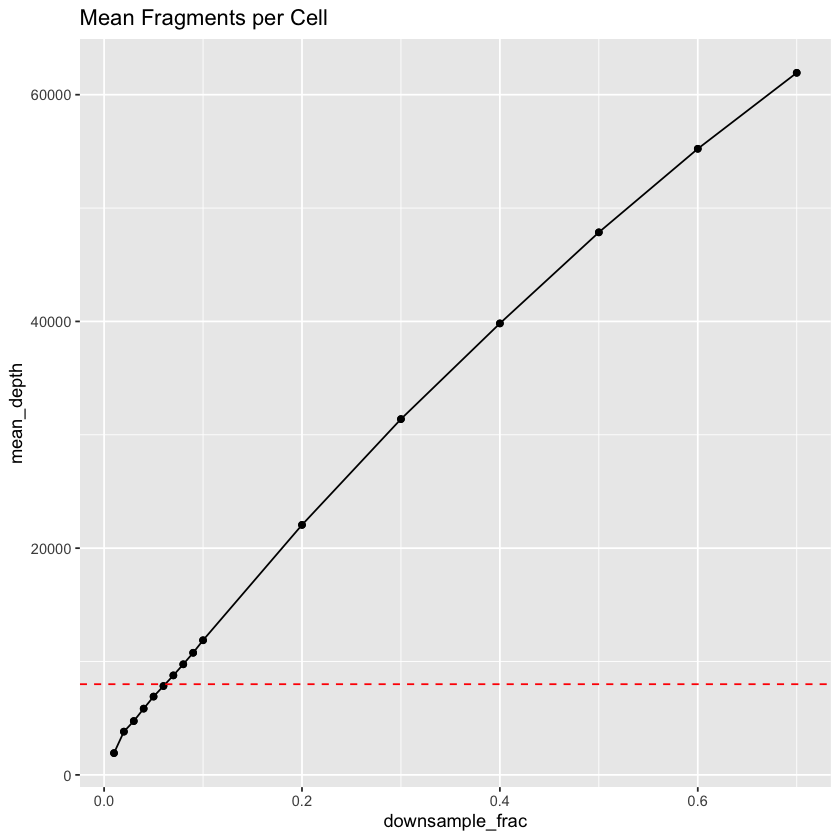

In [3]:
fpc_plot = ggplot(downsample_df, aes(downsample_frac, mean_depth)) + geom_point() + ggtitle("Mean Fragments per Cell")
fpc_plot + geom_line() + geom_hline(yintercept=8000, linetype="dashed", color = "red")

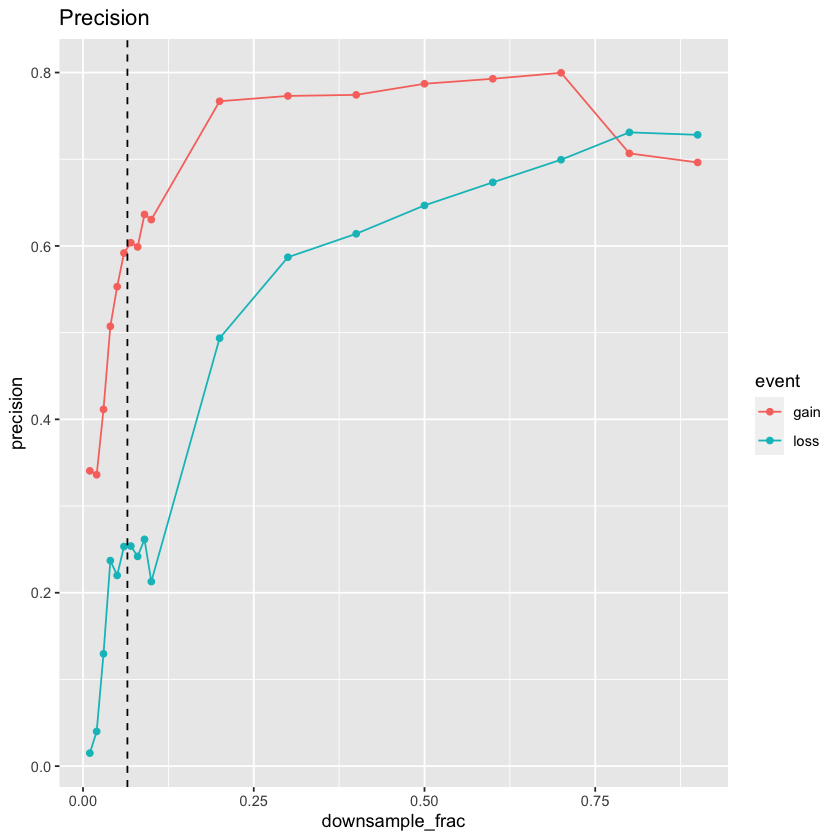

In [11]:
precision_plot = ggplot(downsample_df, aes(downsample_frac, precision, color=event)) + geom_point() + ggtitle("Precision")
precision_plot + geom_line() + geom_vline(xintercept = 0.065, linetype="dashed")

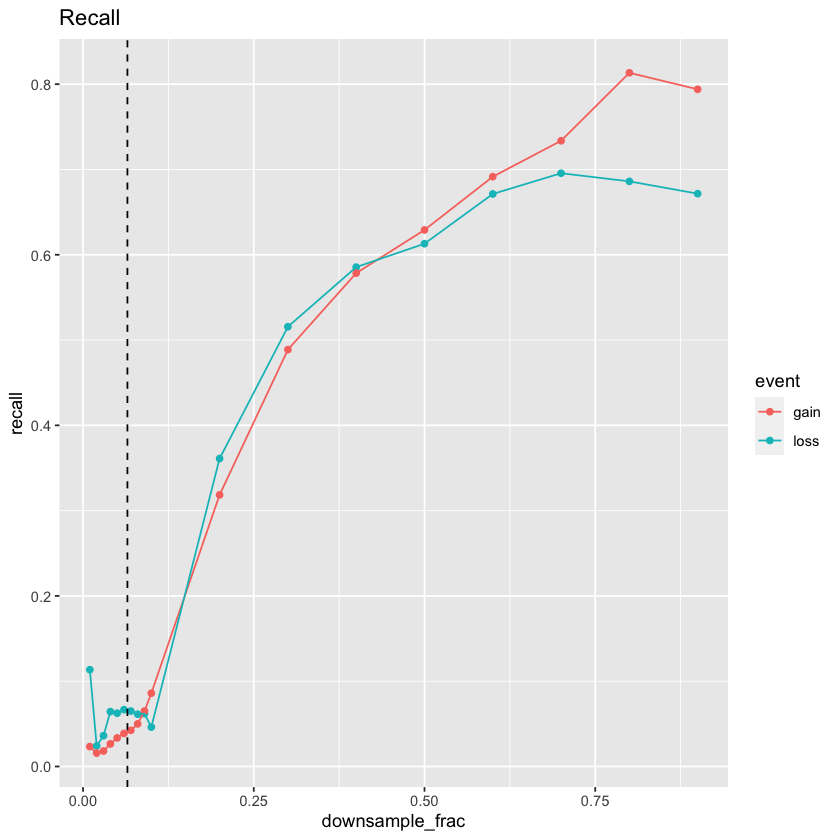

In [12]:
recall_plot = ggplot(downsample_df, aes(downsample_frac, recall, color=event)) + geom_point() + ggtitle("Recall")
recall_plot + geom_line() + geom_vline(xintercept = 0.065, linetype="dashed")

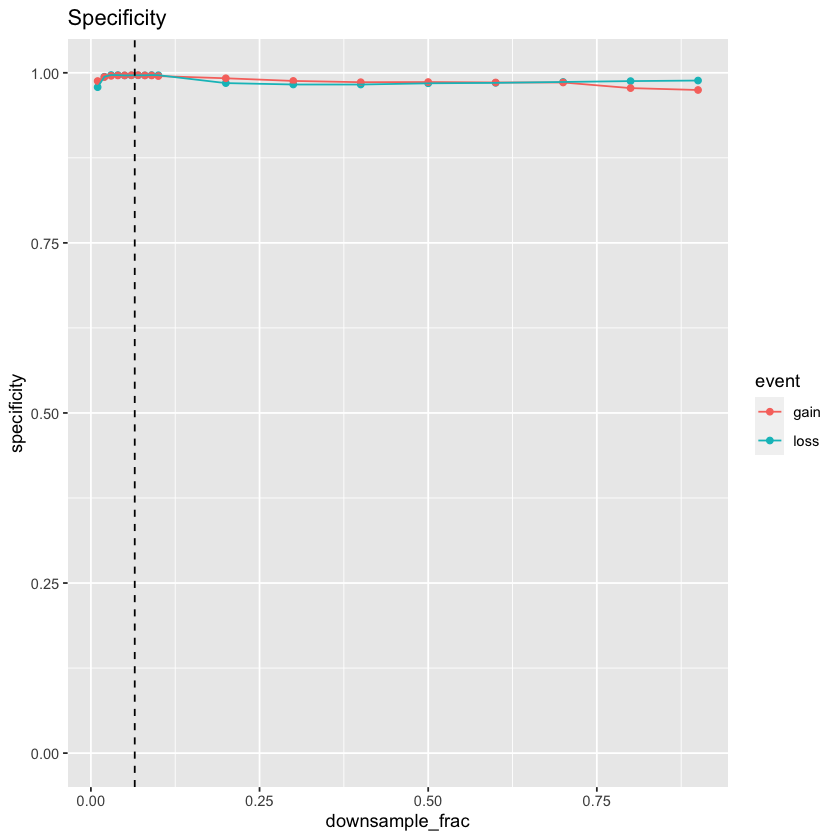

In [13]:
specificity_plot = ggplot(downsample_df, aes(downsample_frac, specificity, color=event)) + geom_point() + ggtitle("Specificity")
specificity_plot + geom_line() + geom_vline(xintercept = 0.065, linetype="dashed") + ylim(0,1)